In [1]:
import numpy as np
import sys
import itertools as itertools
sys.path.append("..")
sys.path.append("../..")

import matplotlib.pyplot as plt
from python.Hubbard import *
from python.DMRG import DMRG
from python.Zippers import MPO_to_Hamiltonian, contract_MPS
from python.Canonical_Form import get_Neumann_entropy
from python.Backend import Backend
from python.Decomposition import EIGH

In [100]:
n_sites = 40

hopping_t = 1.0
interaction_U = 5
chemical_potential = 0.5
bk = Backend("numpy")
# bk = Backend("torch")

Hamiltonian = Hubbard_model_with_filling(
    bk=bk, n_sites=n_sites, hopping_t=hopping_t,
    interaction_U=interaction_U, chemical_potential=chemical_potential,
)

# MPO_transposed = [bk.transpose(ham, (2, 3, 0, 1)) for ham in Hamiltonian]

In [101]:
# """
# Get exact matrix (exponential barrier)
# """

# matrix = MPO_to_Hamiltonian(MPO_transposed, bk=bk)
# eigvals, _ = EIGH(matrix, bk=bk)
# eigvals

In [102]:
# np.linalg.norm(matrix - matrix.conj().T)

In [103]:
NKeep = 40
NSweep = 20
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-2
two_site = True
verbose = True

In [ ]:
ground_energies, ground_times, ground_MPS = DMRG(
    bk = bk,
    Hamiltonian = Hamiltonian,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = True,
    two_site = two_site,
    verbose = verbose,
    tol = 1e-8,
)

# eigvals[0]

L=40 | NKeep=40 | NSweep=20 | diag=True | two=True | Krylov=5 | cutoff=0.01
Iterative diagonalization complete
iter=0 | energy=-42.115011 | time=0js
iter=1 | energy=(-44.574599675468946+0j) | time=7.77618021699891s
iter=2 | energy=(-44.575693743032694+0j) | time=14.841590048999933s
iter=3 | energy=(-44.57575146892449+0j) | time=19.31079828899965s
iter=4 | energy=(-44.57574874005386+0j) | time=23.864852473998326s
iter=5 | energy=(-44.57575684154756+0j) | time=28.451870452998264s
iter=6 | energy=(-44.70005649821326+0j) | time=33.05429289099993s
iter=7 | energy=(-44.71536892468228+0j) | time=37.764480361001915s
iter=8 | energy=(-44.720931138531796+0j) | time=42.34337745200173s
iter=9 | energy=(-44.754183047217936+0j) | time=47.42177265800274s
iter=10 | energy=(-44.76209022770989+0j) | time=50.91350932900241s
iter=11 | energy=(-44.76429337412701+0j) | time=55.411095319002925s
iter=12 | energy=(-44.76471762145068+0j) | time=63.52939089600113s
iter=13 | energy=(-44.7649271981302+0j) | time=7

/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


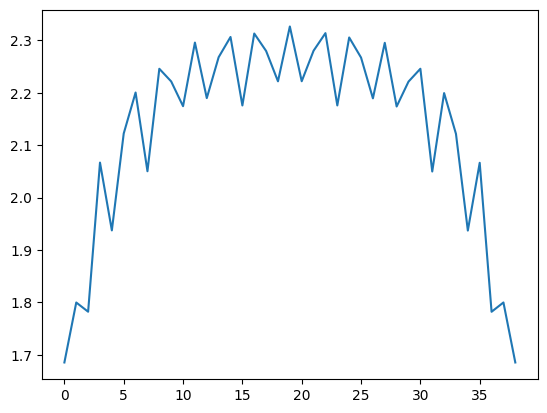

In [105]:
plt.plot(get_Neumann_entropy(ground_MPS, bk = bk,))

In [106]:
get_filling(ground_MPS, bk = bk,).sum()

(29.999992633509713+0j)

In [107]:
get_spin_z(ground_MPS, bk).sum()

(5.650362293526398e-07+0j)

In [109]:
get_total_charge(ground_MPS, bk).sum()

(2.727674070336183e-21+0j)

In [110]:
get_total_spin(ground_MPS, bk).sum()

(8.502202850710859e-40+0j)

In [111]:
charge_correlations = get_charge_correlations(ground_MPS, bk)

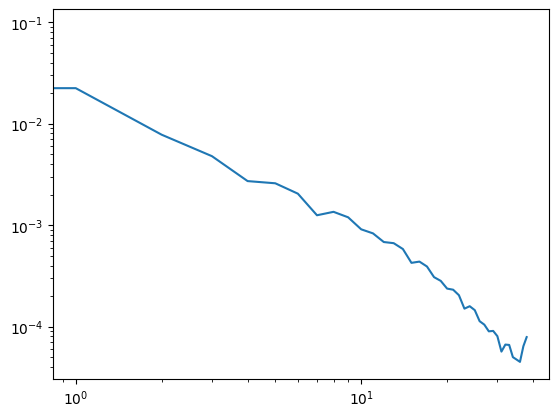

In [118]:
plt.plot(np.abs(charge_correlations[1:]))
# plt.plot(charge_correlations[1:])
plt.yscale("log")
plt.xscale("log")

In [119]:
spin_correlations = get_spin_correlations(ground_MPS, bk)

/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


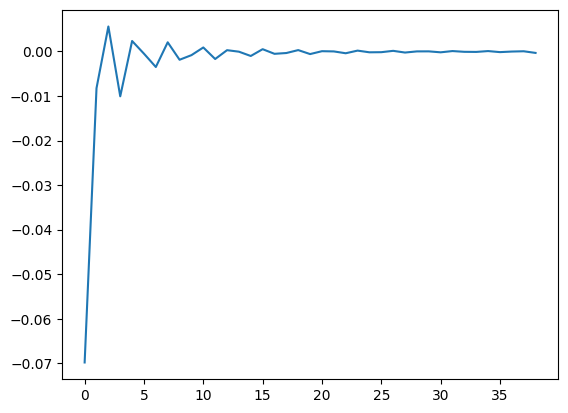

In [120]:
plt.plot(spin_correlations[1:])